# Quantum Optics with Python:
# J-C model and more

This is a series of lectures on some subjects in Quantum Optics.

Author's Infomation:
- Jia-Qi Cai @ School of Physics,Huazhong Univ. of Sci. and Techn.,Wuhan
- Email:caidish@sina.com

## J-C Hamailtonian
  The most fundamental setups of Quantum optics(cavity quantum electrodynamics) can be described by the general quantum Rabi model:
$$
    H_{Rabi} = \omega_{r}(a^{\dagger}a+\frac{1}{2})+\frac{\omega_q}{2}\sigma_z + g(a^{\dagger}+a)(\sigma_{+}+\sigma_{-})
$$
  where $2g$ denotes an experimental parameter the *vacuum Rabi frequency*. $a^\dagger$and $a$ are bosonic creation and annihilation operator, respectively. $\sigma_+$,${\sigma_-}$ are ladder operators in the $\sigma_z$ representation and  $\sigma_+ = \left| e \right \rangle \left\langle g \right| $, $\sigma_- = \left|g\right \rangle \left \langle e \right|$

The Hamiltonian defined above can describe a two-level atom coupled to a standing radiation field in the F-P cavity. The model also becomes a fundamental one in circuit quantum electrodyniamcs to describe the qubit coupled to a transmission line.

Then, the physical picture of this model can be: 

- the self energy of the atom and the radiation field;
- the light-matter interaction part which contains four part:$\sigma_+ a$,$\sigma_- a^{\dagger}$,$\sigma_- a$,$\sigma_+a^{\dagger}$.

The first term and the second term in the interaction part describe the procedure where the atom raises to excited state by absorbing a photon or drop to the ground state by emitting a photon. The third and fourth term can be a little confusing but it really comes due to *uncertainty relation*.

Now, let's do some reasonable simplifications and add some properties to the spherical chicken model. First, due to experimental consideration, the interaction strength in cavity lay in the region:$(\omega_q + \omega_r) \gg {g,\left|\omega_q-\omega_r \right|}$ then after *rotating wave approximation* we can obtain so-called Jaynes-Cummings model:

$$
    H_{JC} = \omega_{r}(a^{\dagger}a+\frac{1}{2})+\frac{\omega_q}{2}\sigma_z + g(a^{\dagger }\sigma_- + a\sigma_+)
$$

As the cavity has finite volume, we sometimes treat the $\frac{1}{2}$ term as a bias and ignore it.
## Dispersion
The loss rate of radiation field $\kappa$ in the cavity and spontaneous emission rate from the atom to the environment $\gamma$ can cause dispersion as well. We should take all of these processes into our Liouvian operator(collapse operator)

In both cavityQED and circuitQED, the qubit is chosen from a multi-level(often infinite level) system, e.g. transmon or bound state of Rb atom. The laser coupled to the qubit is chosen to match the energy difference of the qubit. 

However, the full-picutre Hamiltonian permitting, crosstalk between qubit and outer states can cause loss of fidelity and a case of dispersion. We should define effective Hamiltonian and effective emission operator by mean field theory or some other techniques. But this goes beyond our topic and I will phenomenally define a collapse operator to demonstrate the basic idea.

## Simulation
The Hilbert spaces of our problem contain a two-level atom(2D) and radiation field(infinite dimensions). For the radiation field, we should choose a finite representation(balance the max photon number of the experiment and the power of your computer.)

In [1]:
%matplotlib inline
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
#import neccessary packages

# Generating comtypes.gen._565783C6_CB41_11D1_8B02_00600806D9B6_0_1_2
# Generating comtypes.gen._00020430_0000_0000_C000_000000000046_0_2_0
# Generating comtypes.gen.stdole
# Generating comtypes.gen.WbemScripting


## Setup the operator and model Hamiltonian

In [2]:
g_state = qt.basis(2,0)
e_state = qt.basis(2,1)
sz = qt.sigmaz()
sm = qt.destroy(2)
sp = sm.dag()
I_atom = qt.qeye(2)
#define the operator of the atom(single Hilbert space)

In [19]:
Dimension_of_cavity = 15
a = qt.destroy(Dimension_of_cavity)
adag = a.dag()
vac = qt.basis(Dimension_of_cavity,0)
I_cav = qt.qeye(Dimension_of_cavity)
#define the operator of the cavity

In [20]:
g_vac = qt.tensor(vac,g_state)
sz = qt.tensor(I_cav,sz)
sm = qt.tensor(I_cav,sm)
sp = sm.dag()

a = qt.tensor(a,I_atom)
adag = qt.tensor(adag,I_atom)
#define the full operator by tensor product

## State Excitation as a function of coupling strength
As a powerful tool to get the intuition of J-C Hamiltonian so-called dressed state picture, state excitation as a function of coupling strength will be numerically calculated in this section. You will see why rotating wave approximation is valid.

In [25]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
H0 = wc * adag * a + wa * sp * sm
H1 = (adag + a) * (sm + sp)

step=100
g_range = np.linspace(0,2.0,step+1)*2*np.pi
#generate the list of interaction g

g_list=[]
e_list = []

for g in g_range:
    H = H0 + g * H1
    enr,states = H.eigenstates()
    g_list.append(states[0])
    e_list.append(states[1])
#Using the method [eigtenstates] to obtain eigen states and energy
na = sm.dag() * sm  # atom
nc = a.dag() * a    # cavity
g_na_exp_list = qt.expect(na,g_list)
g_nc_exp_list = qt.expect(nc,g_list)
e_na_exp_list = qt.expect(na,e_list)
e_nc_exp_list = qt.expect(nc,e_list)
#get the excitation number of cavity and photon

## Visualization

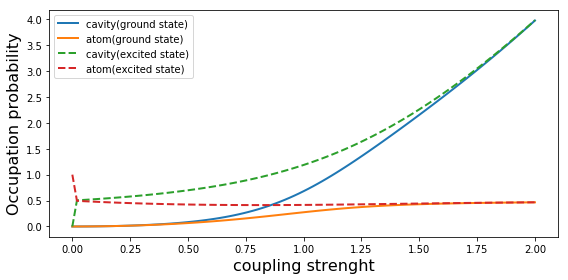

In [27]:
fig,axes = plt.subplots(figsize=(8,4))
axes.plot(g_range/(2*np.pi),g_nc_exp_list,linewidth = 2,label = "cavity(ground state)")
axes.plot(g_range/(2*np.pi),g_na_exp_list,linewidth = 2,label = "atom(ground state)")
axes.plot(g_range/(2*np.pi),e_nc_exp_list,'--',linewidth = 2,label = "cavity(excited state)")
axes.plot(g_range/(2*np.pi),e_na_exp_list,'--',linewidth = 2,label = "atom(excited state)")
axes.set_ylabel("Occupation probability", fontsize=16)
axes.set_xlabel("coupling strenght", fontsize=16)
axes.legend()
fig.tight_layout()

## Result and Analysis
Note that when $g/2\pi$ is less than 1, rotating wave approximation is valid. The vacuum term contribution to the ground state is relatively small and the excitation number operator $N = \sigma_{+}\sigma_{-} + a^{\dagger}a$ is conservative quantity. The coupling only connects the states $\left| g \right \rangle \left| n+1 \right \rangle$ and $\left|e\right \rangle \left|n\right \rangle$ so that the Hmailtonian can be diagonized in this subspace.

From obserbing the fugure above, there exists several special regions(cases).
- Ultrastrong coupling(USC). When $g \gg \{ \omega_a,\omega_c \} = 1 \times 2 \pi$, the excitations become both photonics and atomics.
- Strong Coupling. When $g \approx {\omega_a,\omega_c}$
- Weak Coupling. When $g \ll \{  \omega_a,\omega_c \}$, the rotating wave approximation is valid. We can use Jaynes-Cummings model and dressed state picture to describe most of the physical processes.

## Dressed states picture
Now we solve the Jaynes-Cumming model analytically:
The J-C Hamiltonian $H_{JC}$ can be diagonalized in the subsapce $\{ \left| g \right \rangle \left| n+1 \right \rangle$ , $\left|e\right \rangle \}$ with the eigenvalues:
$$
E^{\pm}_{n} = E(\left| \pm,n\right \rangle) = \omega_r (n + \frac{1}{2}) \pm \frac{1}{2}\sqrt{\Delta^2 + \Omega_{n,r}^2}
$$
and the corresponding eigenstates:
$$
\left| { + ,n} \right\rangle  = \cos (\frac{{{\theta _n}}}{2})\left| e \right\rangle \left| n \right\rangle  + \sin (\frac{{{\theta _n}}}{2})\left| g \right\rangle \left| {n + 1} \right\rangle 
$$
$$
\left| { - ,n} \right\rangle  =  - \sin (\frac{{{\theta _n}}}{2})\left| e \right\rangle \left| n \right\rangle  + \cos (\frac{{{\theta _n}}}{2})\left| g \right\rangle \left| {n + 1} \right\rangle 
$$
Where $\Delta = \omega_q - \omega_r$, $\Omega_n = \sqrt{\Delta^2 + (n+1)\Omega_0^2} $,$\Omega_0 = 2g$
![](./DressedState.png)
The effective coupling between different ladders is $\omega_r + \chi $ and $\chi = \frac{g^2}{\Delta}$
## Measurement of Coupling strength:Vacuum Rabi Splitting
In the resonant case,e.g $\omega_r = \omega_q$, a quantum of energy bounces back and forth between the qubit and the resonator at a rate given by the Rabi frequency $\Omega_{n,r}$. When $n = 0$ *Vacuum Rabi Oscillation* denotes the energy exchage between qubit and the vacuum. The splitting of $\Omega_0$ in the frequency domain due to the first doublet of dressed state is called *Vacuum Rabi Splitting*. Experimental observation of vacuum Rabi oscillations or splitting is a clear indicator of strong coupling:
$$S(\omega) = \int_{-\infty}^{\infty} \left \langle a^{\dagger}(\tau) a(0)\right \rangle e^{-i\omega \tau}d\tau$$

Which is exactly the fourier transformation of a correlator

In QuTip, we can numerically calculate $S(\omega)$ by *qutip.correlation_fft*

### Vacuum Rabi Oscillations:Simulation

In [3]:
%reset  

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

Text(0.5,1,'Vacuum Rabi oscillations')

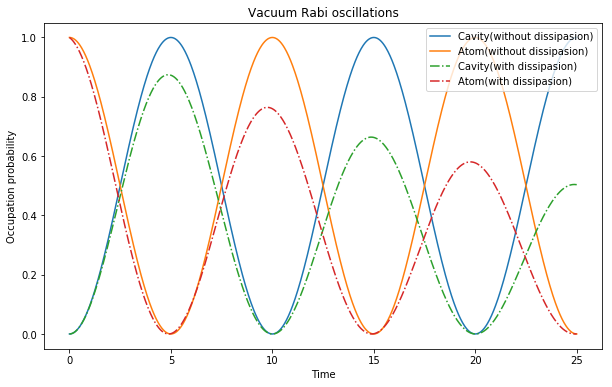

In [96]:
wc = 1.0 * 2 * np.pi
wa = 1.0 * 2 * np.pi
g = 0.05 * 2 * np.pi
kappa = 0.005
gamma = 0.05
N = 15
step = 1001

vac = tensor(basis(N,0),basis(2,0))
a = tensor(destroy(N),qeye(2))
sm = tensor(qeye(N),destroy(2))

H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
c_ops = [np.sqrt(kappa)*a,np.sqrt(gamma)*sm]
t_list = np.linspace(0,25.0,step)

psi0 = sm.dag() * vac

result1 = mesolve(H,psi0,t_list,c_ops,[a.dag()*a,sm.dag()*sm])
result0 = mcsolve(H,psi0,t_list,[],[a.dag()*a,sm.dag()*sm])

n_c_0 = result0.expect[0]
n_a_0 = result0.expect[1] 
n_c_1 = result1.expect[0]
n_a_1 = result1.expect[1]
fig,axes = plt.subplots(1,1,figsize = (10,6))
axes.plot(t_list,n_c_0,label = 'Cavity(without dissipasion)')
axes.plot(t_list,n_a_0,label = 'Atom(without dissipasion)')
axes.plot(t_list,n_c_1,'-.',label = 'Cavity(with dissipasion)')
axes.plot(t_list,n_a_1,'-.',label = 'Atom(with dissipasion)')
axes.legend(loc = 'best')
axes.set_xlabel('Time')
axes.set_ylabel('Occupation probability')
axes.set_title('Vacuum Rabi oscillations')

### Vacuum Rabi Splitting:Simualtion

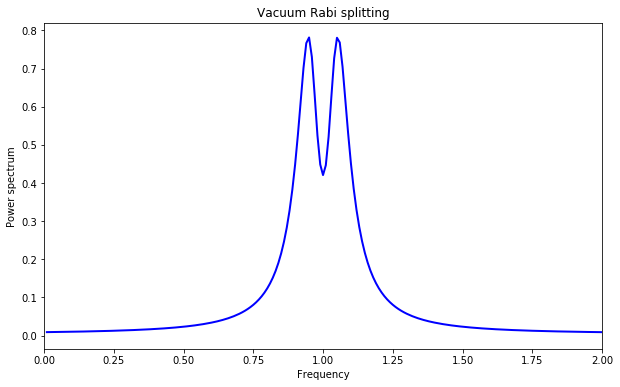

In [70]:
wc = 1.0 * 2 * np.pi
wa = 1 * 2 * np.pi
g = 0.05 * 2 * np.pi
kappa = 0.75
gamma = 0.25
N = 15


vac = tensor(basis(N,0),basis(2,0))
a = tensor(destroy(N),qeye(2))
sm = tensor(qeye(N),destroy(2))

H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
n_th = 0.25
c_ops = [np.sqrt(kappa * (1 + n_th)) * a, np.sqrt(kappa * n_th) * a.dag(), np.sqrt(gamma) * sm]


t_list = np.linspace(0,100,5000)
corr = correlation_2op_1t(H,None,t_list,c_ops,a.dag(),a)
wlist1,spec1 = spectrum_correlation_fft(t_list,corr)

fig, ax = plt.subplots(1, 1,figsize=(10,6))
ax.plot(wlist1 / (2 * np.pi), spec1, 'b', lw=2)
ax.legend()
ax.set_xlabel('Frequency')
ax.set_ylabel('Power spectrum')
ax.set_title('Vacuum Rabi splitting')
ax.set_xlim(0,2)
plt.show()

In [60]:
np.where(spec1 > max(spec1)-0.01)
#find the peak

(array([ 94, 104], dtype=int64),)

In [62]:
w0 = wlist1[94]/(2*np.pi)
#frequency corresponding to peaks

In [61]:
w1 = wlist1[104]/(2*np.pi)

In [65]:
print('g = %f VS splitting = %f'%(g/(2*np.pi),(w1-w0)/2))
# prove that g = vacuum splitting/2

g = 0.050000 VS splitting = 0.049990


### Anti-crossing in the Spectrum-Detuning diagram
The spectrum-detuning experiment has been always used for showing light-matter interaction and affirming coupling strength.

There are serveral spectroscopic methods in cavityQED or circuitQED. We will simulate the case of spontaneous emission spectrum in the thermal bath to show basic idea and the anti-crossing in the spectrum diagram.

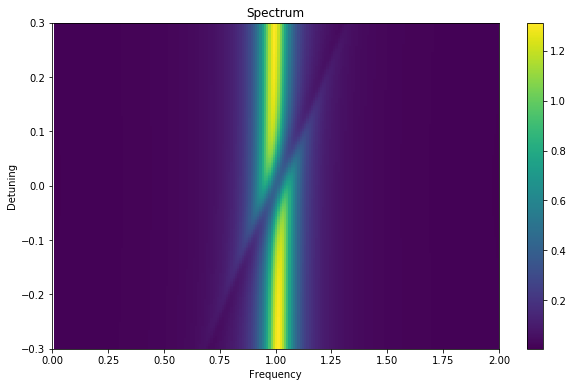

In [130]:
Detuning_vec = np.linspace(-0.3,0.3,201)*np.pi*2
wc = 1.0 * 2 * np.pi
g = 0.05 * 2 * np.pi
kappa = 0.75
gamma = 0.25
N = 15
vac = tensor(basis(N,0),basis(2,0))
a = tensor(destroy(N),qeye(2))
sm = tensor(qeye(N),destroy(2))
n_th = 0.25
c_ops = [np.sqrt(kappa * (1 + n_th)) * a, np.sqrt(kappa * n_th) * a.dag(), np.sqrt(gamma) * sm]
t_list = np.linspace(0,100,5000)

spec_list = []
for Delta in Detuning_vec:
    wa = wc + Delta
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
    corr = correlation_2op_1t(H,None,t_list,c_ops,a.dag(),a)
    wlist1,spec1 = spectrum_correlation_fft(t_list,corr)
    spec_list.append(spec1)
plt.subplots(1,1,figsize = (10,6))
z_min, z_max = -np.abs(spec_list).max(), np.abs(spec_list).max()
plt.pcolor(wlist1/(2*np.pi),Detuning_vec/(2*np.pi),spec_list)
plt.axis([0,2,-0.3,0.3])
plt.xlabel('Frequency')
plt.ylabel('Detuning')
plt.title('Spectrum')
plt.colorbar()

## Exercise
Reproduce the figure in PRA,91,043846,S.Zeytinoglu & S.Filipp,etc.:

![](./PRA_philip.png)

## Confirmation of Quantum State of Cavity 
In addtion to the cavity's and atom's excitation probabilities, the quasi-probability distribution of the cavity state can give some valuable insight in the nature of the state of the cavity.

For instance, when there is negative probability density, we confirm that the cavity is in a non-classical state.

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
import matplotlib as mpl

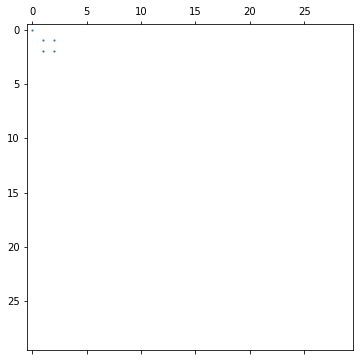

In [102]:
wc = 1.0 * 2 * np.pi
wa = 1.0 * 2 * np.pi
g = 0.05 * 2 * np.pi
kappa = 0.005
gamma = 0.05
N = 15
step = 1001

vac = tensor(basis(N,0),basis(2,0))
a = tensor(destroy(N),qeye(2))
sm = tensor(qeye(N),destroy(2))

H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
c_ops = [np.sqrt(kappa)*a,np.sqrt(gamma)*sm]
t_list = np.linspace(0,25.0,step)

psi0 = sm.dag() * vac

output = mesolve(H,psi0,t_list,c_ops,[])
fig = plt.figure(figsize=(8,6))
plt.spy(output.states[-1].data,ms=1)

Now let's look at the Wigner function at some special time points: $t = 0,5,10,15,20,25$

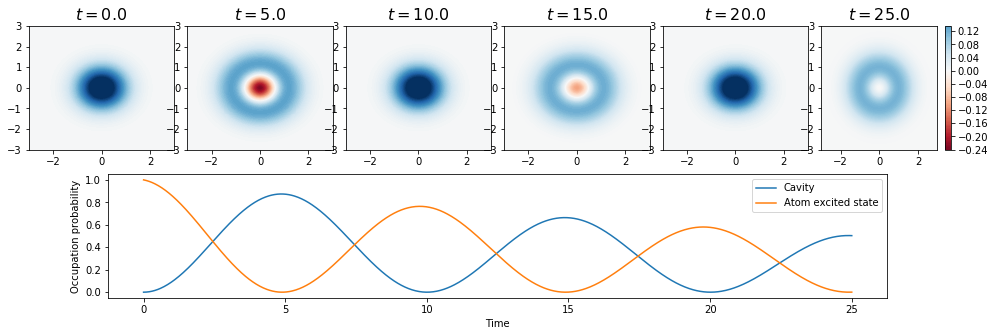

In [115]:
t_idx = np.where([t_list == t for t in [0.0, 5.0, 10, 15, 20, 25]])[1]
rho_list = np.array(output.states)[t_idx]

fig_grid = (2, len(rho_list)*2)
fig = plt.figure(figsize=(2.8*len(rho_list),5))
xvec = np.linspace(-3,3,200)

for idx, rho in enumerate(rho_list):
    rho_cavity = ptrace(rho, 0)
    W = wigner(rho_cavity, xvec, xvec)
    ax = plt.subplot2grid(fig_grid, (0, 2*idx), colspan=2)
    if idx == 1:
        col = ax.contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.25,.25), cmap=plt.get_cmap('RdBu'))
    ax.contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.25,.25), cmap=plt.get_cmap('RdBu'))
    ax.set_title(r"$t = %.1f$" % t_list[t_idx][idx], fontsize=16)
fig.colorbar(col)
# plot the cavity occupation probability in the ground state
ax = plt.subplot2grid(fig_grid, (1, 1), colspan=(fig_grid[1]-2))
ax.plot(t_list, n_c_1, label="Cavity")
ax.plot(t_list, n_a_1, label="Atom excited state")
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Occupation probability');